In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_set = pd.read_csv('/kaggle/input/titanic/train.csv')
test_set = pd.read_csv('/kaggle/input/titanic/test.csv')
train_test = [train_set,test_set]
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The coloumns PassengerId, Name of passenger, Ticket and Cabin number will be dropped as they have no effect on the survival rate.
These features are redundant.

In [5]:
for dataset in train_test:
    dataset.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Next, we will resort to some data visualization techniques to study the features. As an example, the number of survivors and the number of dead are
plotted in bar graph.

Text(0, 0.5, 'Count')

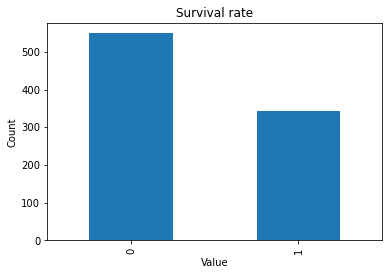

In [6]:
count_classes = pd.value_counts(train_set['Survived'], sort=True).sort_index()
count_classes.plot(kind = 'bar')
plt.title('Survival rate')
plt.xlabel('Value')
plt.ylabel('Count')

We should check whether any of the features are correlated.
A high value for correlation between two features indicates that using either one of these features should suffice.
The heatmap below shows that neither of the features are heavily correlated and hence each will be treated independently.

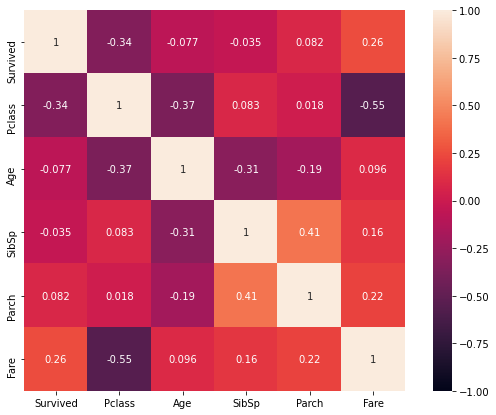

In [7]:
corrmat_train = train_set.corr()
fig = plt.figure(figsize=(10,7))
sns.heatmap(corrmat_train,vmax=1,square=True,annot=True,vmin=-1)
plt.show()

Histograms are plotted to get a general idea of the passenger count for each of the coloumns. The conclusions are;
1. Max. number of passengers were travelling in class 3
2. The median age of passengers was around 30 years
3. A majority of the passengers didn't have siblings on board. 
4. A majority of the passengers didn't have parents on board.

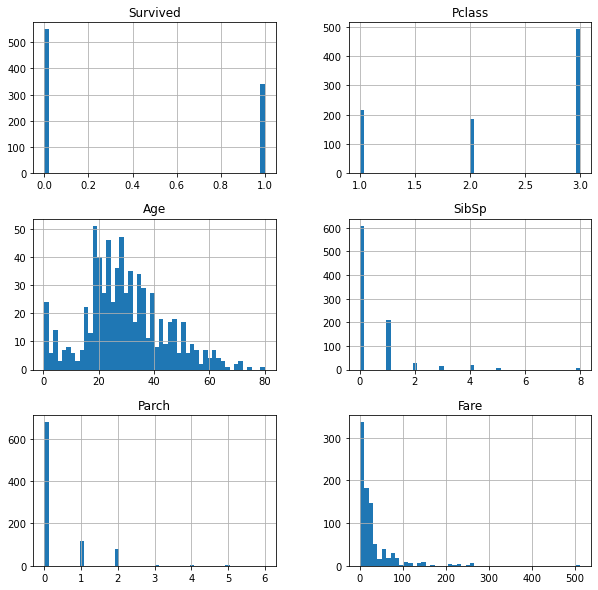

In [8]:
train_set.hist(bins=50,figsize=(10,10))
plt.show()

Count plots are plotted to get an intuition as to which passengers survived and which died. Conclusions;
1. A majority of the passengers who died were male.
2. Most casualities were in from class 3.
3. Majority of the passengers who died had neither sibligs nor parents on board.

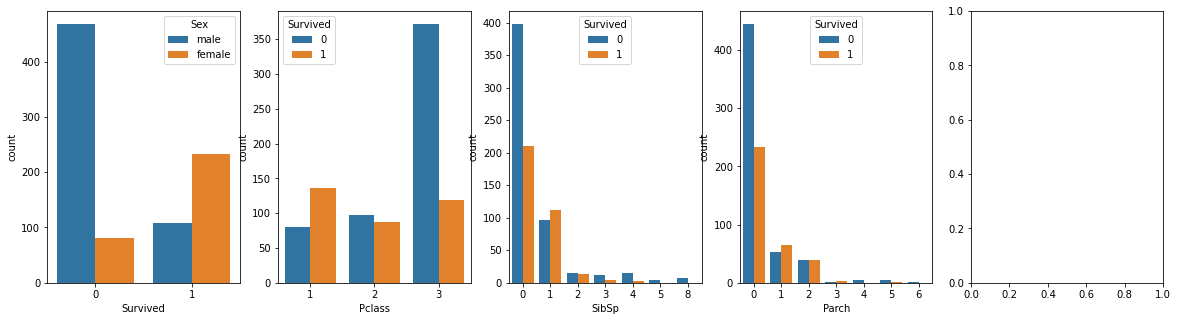

In [9]:
fig,ax = plt.subplots(1,5,figsize=(20,5))
sns.countplot('Survived', data = train_set,hue='Sex',ax=ax[0])
sns.countplot('Pclass', data = train_set,hue='Survived',ax=ax[1])
sns.countplot('SibSp', data = train_set,hue='Survived',ax=ax[2])
sns.countplot('Parch', data = train_set,hue='Survived',ax=ax[3])

A FacetGrid is used to analyze age and survival rate correlation. Majority of the passengers who died were between the ages of 16-40,
while infants and the elderly mostly survived. 

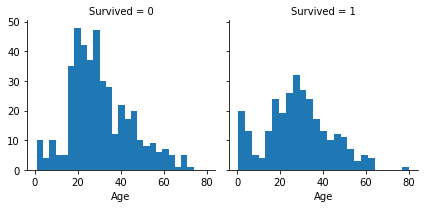

In [10]:
age_s = sns.FacetGrid(train_set,col='Survived')
age_s.map(plt.hist,'Age',bins=25)

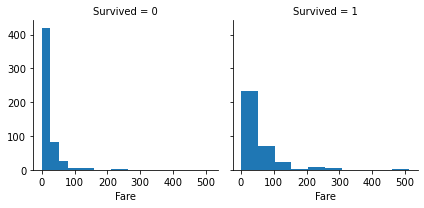

In [11]:
fare_s = sns.FacetGrid(train_set,col='Survived')
fare_s.map(plt.hist,'Fare',bins=10)

As a next step, we need to convert string data into numeric data. These are the features, Sex and Embarkment.

In [12]:
for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map({'male':1,'female':0}).astype(int)

In [13]:
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna(method='ffill')
    dataset['Embarked'] = dataset['Embarked'].map({'C':0,'S':1,'Q':2}).astype(int)

We need to change the value in the 'Age' coloumn. The values have split into four ranges and assigned a number.
Similarly the fare, siblings and parents values are grouped by ranges.

In [14]:
for dataset in train_test:
    dataset['Age'] = pd.cut(dataset['Age'], bins=[0,15,35,50,80], labels=[1,2,3,4])
    dataset['Fare'] = pd.cut(dataset['Fare'], bins=[0,7,14,300,600], labels=[1,2,3,4])
    dataset['SibSp'] = pd.cut(dataset['SibSp'], bins=[-0.001,0,2,4,8], labels=[0,1,2,3],include_lowest=True)
    dataset['Parch'] = pd.cut(dataset['Parch'], bins=[-0.001,0,1,2,6], labels=[0,1,2,3],include_lowest=True)


In [15]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,2,1
1,1,1,0,3,1,0,3,0
2,1,3,0,2,0,0,2,1
3,1,1,0,2,1,0,3,1
4,0,3,1,2,0,0,2,1


In [16]:
test_set.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,2,2
1,3,0,3,1,0,1,1
2,2,1,4,0,0,2,2
3,3,1,2,0,0,2,1
4,3,0,2,1,1,2,1
5,3,1,1,0,0,2,1
6,3,0,2,0,0,2,2
7,2,1,2,1,1,3,1
8,3,0,2,0,0,2,0
9,3,1,2,1,0,3,1


The first machine learnning algorithm we will use is the linear regression algorithm.

In [17]:
X_train = train_set.drop('Survived',axis=1)
Y_train = train_set['Survived']
X_test = test_set
X_train.shape, Y_train.shape, X_test.shape


((891, 7), (891,), (418, 7))

In [18]:
#Logistic regression for supervised learning
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred_test = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


61.62

 Next, we use the K nieghbors, SVM and decision trees to calculate the accuracy of the test set.

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.97

In [20]:
svm = SVC()
svm.fit(X_train,Y_train)
Y_pred = svm.predict(X_test)
acc_svm = round(knn.score(X_train, Y_train) * 100, 2)
acc_svm

85.97

In [21]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, Y_train)
Y_predictions = dectree.predict(X_test)
acc_dectree = round(dectree.score(X_train, Y_train) * 100, 2)
acc_dectree

87.88

In [22]:
test_org = pd.read_csv('/kaggle/input/titanic/test.csv')
output = pd.DataFrame({'PassengerId': test_org.PassengerId, 'Survived': Y_predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
